In [30]:
import numpy as np
import matplotlib.pyplot as plt
from natsort import natsorted
import glob as g
from silx.io.dictdump import dicttoh5, h5todict
from mpes import analysis as aly

## 1. Patches from band-mapping data

In [31]:
fnst = natsorted(g.glob(r'..\WSe2\pes\*.h5'))

In [73]:
fdata = h5todict(fnst[2])

In [74]:
fdata.keys()

dict_keys(['axes', 'binned'])

In [75]:
mc = aly.MomentumCorrector(fdata['binned']['V'])

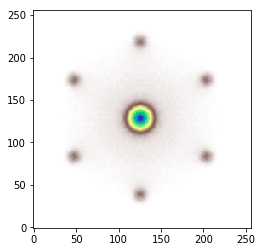

In [76]:
mc.selectSlice2D(selector=slice(30, 32), axis=2)
mc.view(mc.slice)

In [77]:
mc.featureExtract(mc.slice, method='daofind', sigma=6, fwhm=20, symscores=False)

In [78]:
try:
    mc.pouter_ord = mc.pouter_ord[[0,1,3,5,6,9],:]
except:
    pass

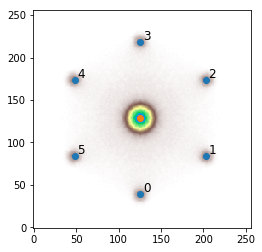

In [79]:
mc.view(image=mc.slice, annotated=True, points=mc.features)

### 1.1 Region around a $\overline{\mathrm{K}}$ point in band-mapping data

In [80]:
rk, ck = np.rint(mc.pouter_ord[0,:]).astype('int')
rk, ck

(39, 126)

In [81]:
kofs = 15
vk = fdata['binned']['V'][rk-kofs:rk+kofs,ck-kofs:ck+kofs,:]

Text(0.5, 1.0, 'Integrated energy distribution curve around $\\overline{\\mathrm{K}}$ point')

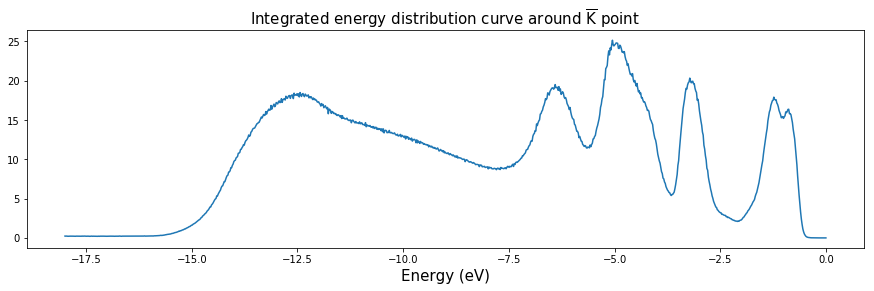

In [96]:
# Plot average spectrum
plt.figure(figsize=(15, 4))
plt.plot(fdata['axes']['E'], vk.mean(axis=(0,1)))
plt.xlabel('Energy (eV)', fontsize=15)
plt.title('Integrated energy distribution curve around $\overline{\mathrm{K}}$ point', fontsize=15)

In [83]:
vkpoint = {'V':vk, 'E':fdata['axes']['E'], 'kx':fdata['axes']['kx'][ck-kofs:ck+kofs],
           'ky':fdata['axes']['ky'][rk-kofs:rk+kofs]}

In [65]:
dicttoh5(vkpoint, r'..\WSe2\pes\kpoint\kpoint_preprocessed.h5')

### 1.2 Region around an $\overline{\mathrm{M}^{\prime}}$ point in band-mapping data

In [84]:
rm, cm = np.rint(0.5*(mc.pouter_ord[1,:] + mc.pouter_ord[2,:])).astype('int')
rm, cm

(128, 203)

In [85]:
mofs = 25
vm = fdata['binned']['V'][rm-mofs:rm+mofs, cm-mofs:cm+mofs, :]
# recpatchm = recon[:,rm-mofs:rm+mofs,cm-mofs:cm+mofs]

Text(0.5, 1.0, 'Integrated energy distribution curve around $\\overline{\\mathrm{M}^{\\prime}}$ point')

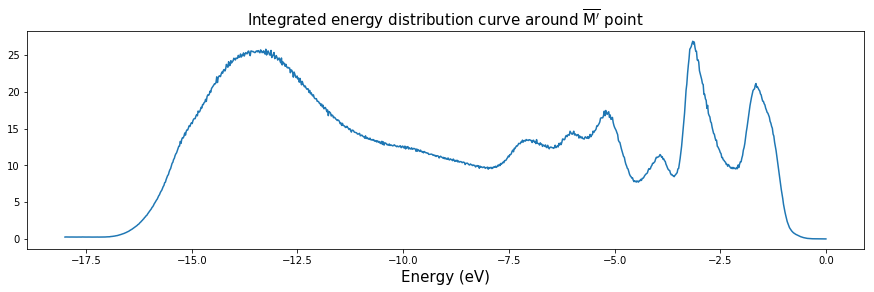

In [95]:
# Plot average spectrum
plt.figure(figsize=(15, 4))
plt.plot(fdata['axes']['E'], vm.mean(axis=(0,1)))
plt.xlabel('Energy (eV)', fontsize=15)
plt.title('Integrated energy distribution curve around $\overline{\mathrm{M}^{\prime}}$ point', fontsize=15)

In [87]:
vmpoint = {'V':vm, 'E':fdata['axes']['E'], 'kx':fdata['axes']['kx'][cm-mofs:cm+mofs],
           'ky':fdata['axes']['ky'][rm-mofs:rm+mofs]}

In [88]:
dicttoh5(vmpoint, r'..\WSe2\pes\mpoint\mpoint_preprocessed.h5')

## 2. Patches from band structure calculation 

In [ ]:
fth = r'..\WSe2\theory'

## 3. Patches from band structure reconstruction

In [97]:
frecon = r'..\data\WSe2\recon'
recon = np.load(frecon + r'\postproc_refrotsym_bands_lda.npy')

### 3.1 Region around a $\overline{\mathrm{K}}$ point in reconstructed bands

In [99]:
krecpatch = recon[:,rk-kofs:rk+kofs,ck-kofs:ck+kofs]
krec = {'recon':krecpatch}

In [100]:
dicttoh5(krec, r'..\WSe2\recon\krec_lda_kpoint.h5')

### 3.2 Region around an $\overline{\mathrm{M}^{\prime}}$ point in reconstructed bands

In [101]:
mrecpatch = recon[:,rm-mofs:rm+mofs,cm-mofs:cm+mofs]
mrec = {'recon':mrecpatch}

In [102]:
dicttoh5(mrec, r'..\WSe2\recon\mrec_lda_kpoint.h5')